<a href="https://colab.research.google.com/github/lucascarneirodev/Data-Science-Projects/blob/main/Mod03_Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de desempenho e atritos de funcionários

Imports

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Pré-processamento

In [70]:
data = pd.read_csv('/content/IBM HR Data.csv')


In [71]:
# referência do código: João Rodrigues
def print_metrics(model_name: str, y_test: np.ndarray, y_pred: np.ndarray, y_test_pca: np.ndarray, y_pred_pca: np.ndarray) -> str:
  """
  Returns the accuracy, precision and recall scores of the model
      
      Arguments:
          model_name {str} -- name of the model
          y_test {array} -- array of the test labels
          y_pred {array} -- array of the predicted labels
          y_test_pca {array} -- array of the test labels after PCA
          y_pred_pca {array} -- array of the predicted labels after PCA
      
      Returns:
          A formatted string containing the accuracy, precision and recall scores of the model for both non-PCA and PCA.
  
  """
  return (f'''
Acurácia do Modelo {model_name} sem PCA: {accuracy_score(y_test, y_pred):.4f}
Acurácia do Modelo {model_name} com PCA: {accuracy_score(y_test_pca, y_pred_pca):.4f}

Precisão do Modelo {model_name} sem PCA: {precision_score(y_test, y_pred, average='macro'):.4f}
Precisão do Modelo {model_name} com PCA: {precision_score(y_test_pca, y_pred_pca, average='macro'):.4f}

Recall (Sensibilidade) do Modelo {model_name} sem PCA: {recall_score(y_test, y_pred, average='macro'):.4f}
Recall (Sensibilidade) do Modelo {model_name} com PCA: {recall_score(y_test_pca, y_pred_pca, average='macro'):.4f}
''')

In [72]:
data['turnover'] = data['Attrition'].replace({'Yes': 1, 'No': 0})

data['BusinessTravel'] = data['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

data['EducationField'] = data['EducationField'].replace({'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3, 'Medical': 4, 'Other': 5, 'Technical Degree': 6})

data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 2})

data['Department'] = data['Department'].replace({'Sales': 3, 'Research & Development': 2, 'Human Resources': 1})

data['JobRole'] = data['JobRole'].replace({'Sales Executive': 8, 'Research Scientist': 6, 'Laboratory Technician': 3,
       'Manufacturing Director': 5, 'Healthcare Representative': 1, 'Manager': 4,
       'Sales Representative': 9, 'Research Director': 6, 'Human Resources': 2})

data['MaritalStatus'] = data['MaritalStatus'].replace({'Married': 2, 'Single': 3, 'Divorced': 1})

data['Over18'] = data['Over18'].replace({'Y': 1, 'N': 2})

data['OverTime'] = data['OverTime'].replace({'Yes': 2, 'No': 1})

## Exercicio 1. (2 pontos)
Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.
> Indented block



In [73]:
data.corrwith(data['turnover'])

Age                        -0.159205
BusinessTravel              0.127006
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.069875
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

Considerei que o valor da hora trabalhada, idade e distancia de casa como variáveis mais importantes.

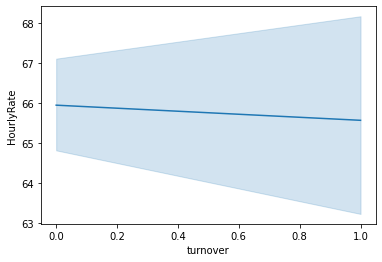

In [63]:
sns.lineplot(x='turnover', y='HourlyRate', data=data)

O gráfico acima mostra uma fraca correlação entre preço/hora e saída da empresa, mas a correlação ainda existe.

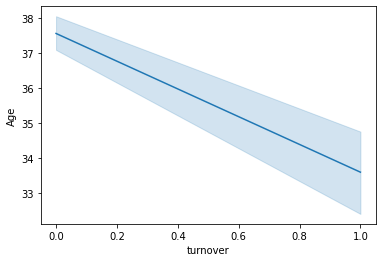

In [64]:
sns.lineplot(x='turnover', y='Age', data=data)

O gráfico acima deixa clara a tendência de que quanto mais jovem o funcionário, maiores as chances dele deixar a empresa.

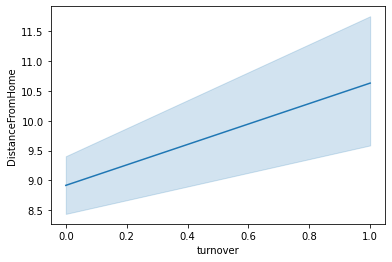

In [65]:
sns.lineplot(x='turnover', y='DistanceFromHome', data=data)

No gráfico acima também fica clara a correlação entre distancia da residência do funcionário e a empresa com a saída do fucnionário da empresa.

##Exercício 2.(1 ponto)

Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

In [74]:
X = data.drop(['Attrition', 'turnover'], axis=1)
y = data['turnover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=8, step=1, verbose=0, importance_getter='auto')
selector = selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears'],
      dtype=object)

In [76]:
selector = RFE(LogisticRegression(random_state=42, max_iter=3000), n_features_to_select=8, step=1, verbose=0, importance_getter='auto')
selector = selector.fit(X_train, y_train)
selector.get_feature_names_out()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array(['BusinessTravel', 'Department', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime'],
      dtype=object)

#Exercicio 3. (2 pontos)
Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [68]:
X = data[['BusinessTravel', 'Department', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime']]
X.head()

Xstd = StandardScaler().fit_transform(X)
tree = DecisionTreeClassifier(random_state=42)

X_std_pca = PCA(n_components='mle').fit(Xstd)
X_std_pca = PCA(n_components=1).fit_transform(Xstd)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size=0.3, random_state=42)
tree.fit(X_train_pca, y_train_pca)
y_pred_pca = tree.predict(X_test_pca)

X_train, X_test, y_train, y_test = train_test_split(Xstd, y, test_size=0.3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [40]:
print(print_metrics(model_name='Decision Tree', y_test=y_test, y_pred=y_pred, y_test_pca=y_test_pca, y_pred_pca=y_pred_pca))


Acurácia do Modelo Decision Tree sem PCA: 0.8186
Acurácia do Modelo Decision Tree com PCA: 0.7800

Precisão do Modelo Decision Tree sem PCA: 0.5893
Precisão do Modelo Decision Tree com PCA: 0.5357

Recall (Sensibilidade) do Modelo Decision Tree sem PCA: 0.5713
Recall (Sensibilidade) do Modelo Decision Tree com PCA: 0.5352



#Exercicio 4. (1 ponto)
Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

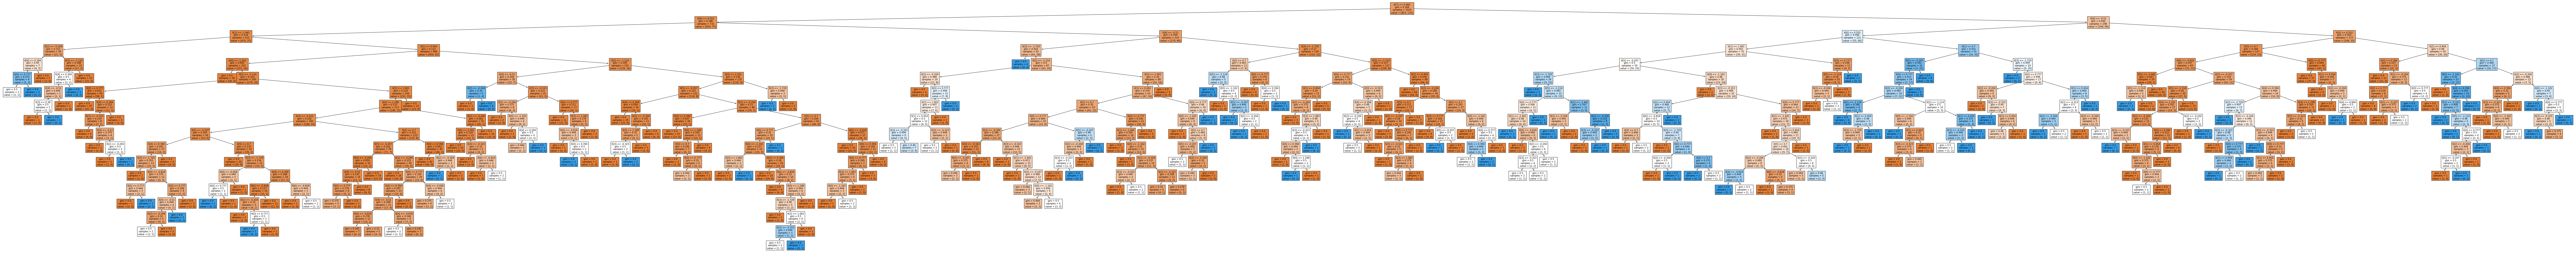

In [45]:
plt.figure(figsize = [200,20])
plot_tree(tree,filled=True, fontsize=10)
plt.show()

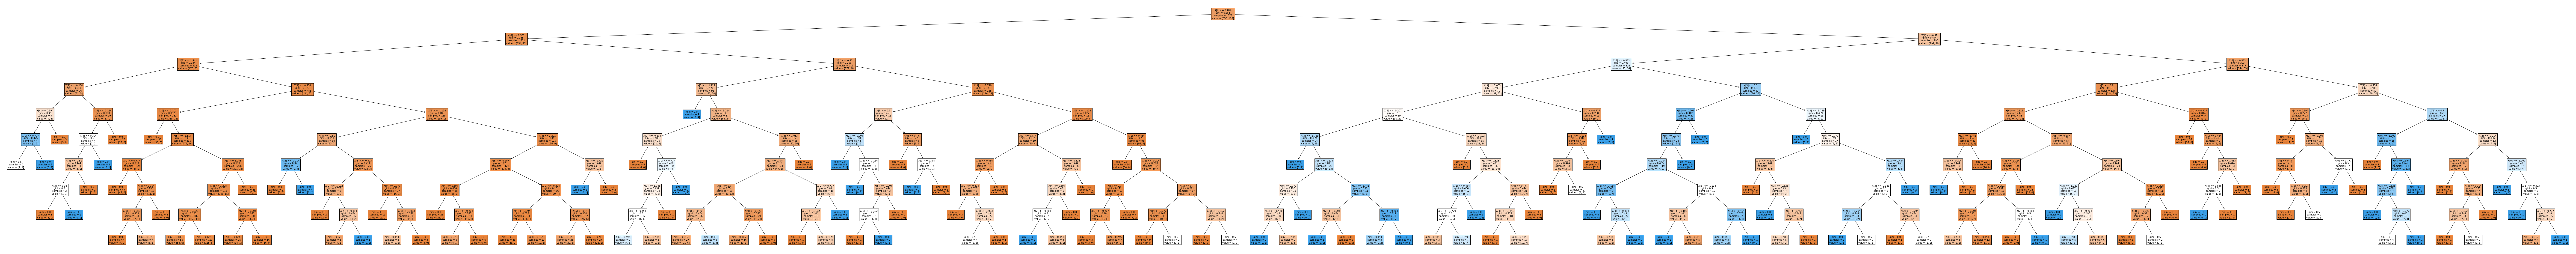

In [47]:
tree_poda = DecisionTreeClassifier(random_state=42,max_depth=9)
tree_poda.fit(X_train, y_train)
y_pred = tree_poda.predict(X_test)

plt.figure(figsize = [200,20])
plot_tree(tree_poda,filled=True, fontsize=10) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

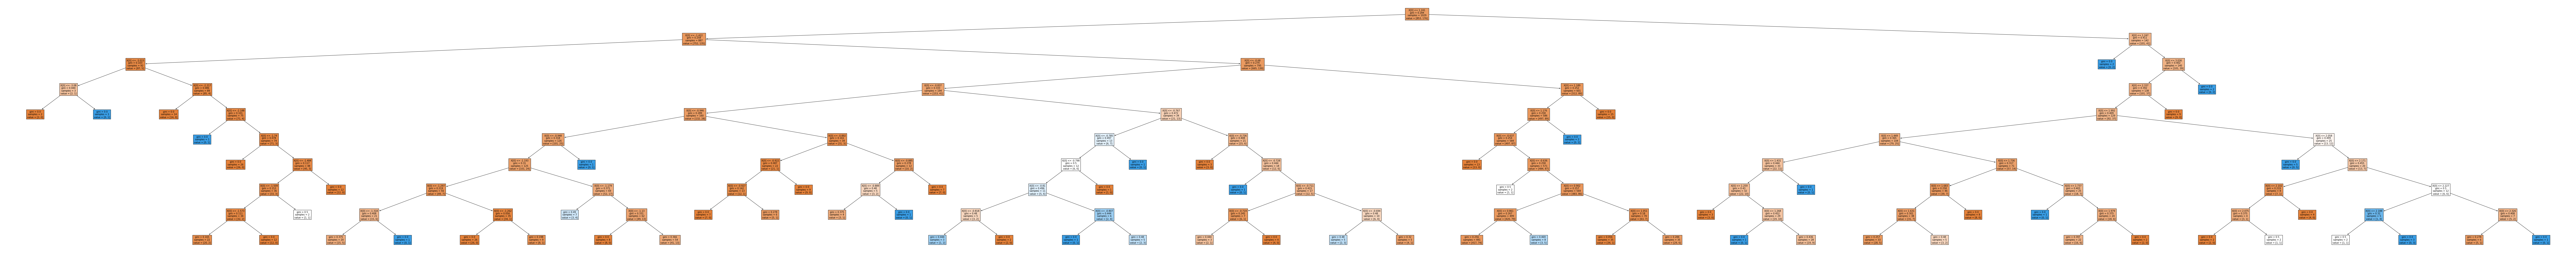

In [49]:
tree_poda.fit(X_train_pca, y_train_pca)
y_pred_pca = tree_poda.predict(X_test_pca)

plt.figure(figsize = [200,20])
plot_tree(tree_poda,filled=True, fontsize=10)
plt.show()

O índice Gini é responsável por medir o grau de heterogeneidade dos dados e pode ser utilizado para medir a impureza de um nó.
Quando este índice é igual a zero, o nó é puro. Por outro lado, quando ele se aproxima do valor um, o nó é impuro (aumenta o número de classes uniformemente distribuídas neste nó).

#Exercicio 5. (3 pontos)
**Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?**

Uma floresta aleatória é simplesmente uma coleção de árvores de decisão cujos resultados são agregados em um resultado final. Sua capacidade de limitar o overfitting sem aumentar substancialmente o erro devido ao viés é o motivo pelo qual eles são modelos tão poderosos. Uma maneira pela qual as Random Forests reduzem a variância é treinando em diferentes amostras dos dados.

Já o AdaBoost monta árvores com o método de _"decision stump"_, isto é, árvores com um nó e duas folhas. A partir daí, o AdaBoost busca os melhores _decision stumps_ para montar uma árvore completa e vai corrigindo de forma iterativa os nós que obtiveram predições ruins. Por essa razão, o AdaBoost geralmente entrega um modelo mais acurado que o Random Forest, mas também é mais sensível a overfitting.

#Exercicio 6. (1 ponto)
Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

In [81]:
data['Gender'].value_counts()

2    882
1    588
Name: Gender, dtype: int64

In [87]:
data['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [85]:
data['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Não recomendaria esses dados visto que não existem modelos com acurácia de 100% e como observado acima, esses dados não estão balanceados o que pode trazer viéses negativos relacionados a etarismo, discriminação de gênero e exclusão.